In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

T1= 0.00012145479479806652 #Hz 
w=T1

E1=T1 # this is probably not correct
E2=T1 # same as above

In [34]:
t_i = 0 # intial time
t_f = 800#final time
nsteps = 75 # number of steps between intial and final times
time = np.linspace(0,t_f, 75)/1e6
#xd = time/1e3

h = (t_f-t_i)/nsteps # increments
#intial_p=np.array([[1, 0],[0,0]])

def HEOM_eqn_solver(gamma1,gamma2,lamda1,lamda2,V1,V2,w,E1,E2,T1,beta,temp):
    #intial_val=np.array([[1, 0],[0,0]],dtype=complex)
    
    H=np.array([[w/2, E1],[E2,-w/2]], dtype=complex)
    V1=np.array([[1, 0],[0,0]], dtype=complex)
    V2=np.array([[0, 1],[0,0]], dtype=complex)
    
    lamda1=(1.0/T1)*1e6 #us
    lamda2=(1.0/T1)*1e6 #us
    gamma1=10**(-15) #us-1
    gamma2=10**(-15) #us-1
    kb= 1.380649*(10**(-23)) #J.K-1
    temp=2.15 #K
    beta=1/(kb*temp) # J-1
    h_bar=1.054571817*(10**(-28)) #j.us
    
    C=2*lamda1/beta*(h_bar**2) #j.us
    D=lamda1*gamma1/h_bar #j-1
    E=2*lamda2/beta*(h_bar**2) #j.us
    F=lamda2*gamma2/h_bar #j-1

    
    current_state = np.zeros((6,2,2),dtype=complex) # 6 2x2 matrices for p, \sigma_(0,1),\sigma_(1,0),\sigma_(1,1),\sigma_(2,0),\sigma_(0,2)
    prev_state = np.zeros((6,2,2),dtype=complex)

    current_state[0] = np.array([[1, 0],[0,0]], dtype=complex) # inital value for p
    prev_state[0]=current_state[0]

    p_matrix=np.zeros((nsteps,2,2),dtype=complex) # matrix that stores the matrices for d/dt(p)(results)
    p_matrix[0]=current_state[0]

    for index in range(1,len(time)):
        current_state[0] = prev_state[0] + h*( -1j*(np.dot(H,prev_state[0])-np.dot(prev_state[0],H)) + (np.dot(V1,prev_state[1])-np.dot(prev_state[1],V1)) + (np.dot(V2,prev_state[2])-np.dot(prev_state[2],V2)))
        p_matrix[index]=current_state[0] # stores result in p_matrix
        #0,1 # C and D are in units of us^-2
        current_state[1] = prev_state[1] + h*(-1j*(np.dot(H,prev_state[1])-np.dot(prev_state[1],H)) - gamma2*prev_state[1] + (np.dot(V1,prev_state[5])-np.dot(prev_state[5],V1)) + 1j*((C*(np.dot(V2,prev_state[0])-np.dot(prev_state[0],V2)) -1j*D*gamma2*(np.dot(V2,prev_state[0])+np.dot(prev_state[0],V2)))) + (np.dot(V2,prev_state[4])-np.dot(prev_state[4],V2)))
        #1,0 E and F are in units of us^-2
        current_state[2] = prev_state[2] + h*(-1j*(np.dot(H,prev_state[2])-np.dot(prev_state[2],H)) - gamma1*prev_state[2] + (np.dot(V2,prev_state[5])-np.dot(prev_state[5],V2)) + 1j*((E*(np.dot(V1,prev_state[0])-np.dot(prev_state[0],V1)) -1j*F*gamma1*(np.dot(V2,prev_state[0])+np.dot(prev_state[0],V2)))) + (np.dot(V1,prev_state[3])-np.dot(prev_state[3],V1)))

        current_state[3] = prev_state[3] + h*(-1j*(np.dot(H,prev_state[3])-np.dot(prev_state[3],H)))

        current_state[4] = prev_state[4] + h*(-1j*(np.dot(H,prev_state[4])-np.dot(prev_state[4],H)))

        current_state[5] = prev_state[5] + h*(-1j*(np.dot(H,prev_state[5])-np.dot(prev_state[5],H)))
        
        prev_state=current_state

    return p_matrix

sol=HEOM_eqn_solver(gamma1,gamma2,lamda1,lamda2,V1,V2,w,E1,E2,T1,beta,temp)
len(sol)
print(sol)

[[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
  [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]]

 [[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+1.29551781e-03j]
  [ 0.00000000e+00-1.29551781e-03j  0.00000000e+00+0.00000000e+00j]]

 [[ 9.99996643e-01+0.00000000e+00j  8.88314235e+09+2.59103562e-03j]
  [ 1.67836640e-06-2.59103562e-03j  3.35673280e-06+0.00000000e+00j]]

 [[ 9.99989930e-01+1.15082691e+07j  2.66494271e+10-4.60330766e+07j]
  [ 5.03509920e-06-3.88654256e-03j  1.00701984e-05-1.15082691e+07j]]

 [[ 8.94560059e+04+4.60330766e+07j  5.32986901e+10-1.84132306e+08j]
  [ 1.00701880e-05-5.18202776e-03j -8.94550059e+04-4.60330766e+07j]]

 [[ 4.47276029e+05+1.15082479e+08j  8.88306035e+10-4.60330032e+08j]
  [ 1.67842088e-05-2.31787584e+02j -4.47275029e+05-1.15082479e+08j]]

 [[ 1.34182459e+06+2.30164108e+08j  1.33244675e+11-9.20657127e+08j]
  [ 2.51789953e-05-1.39069441e+03j -1.34182359e+06-2.30164108e+08j]]

 [[ 3.13091570e+06+4.02784958e+08j

In [35]:

data1=sol[:,0,0]
dat_r=data1[::-1]  # data was reversed. This is probably not correct.


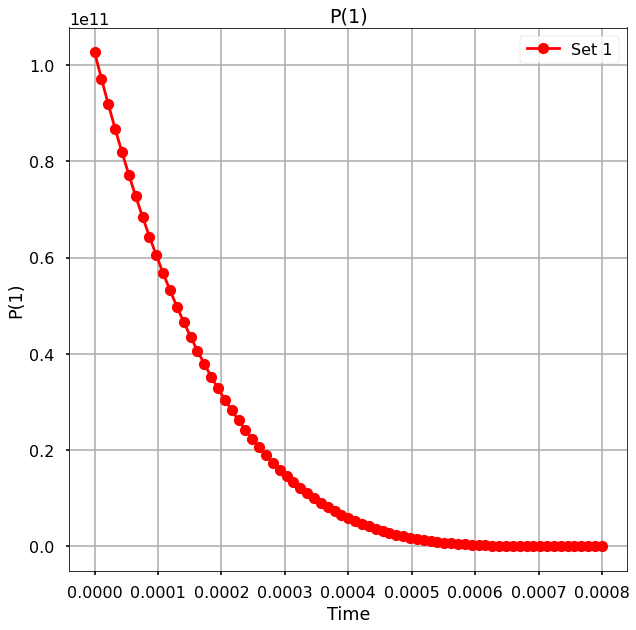

In [36]:

# Create a plot
plt.figure(figsize=(10, 10))
plt.plot(time, np.real(dat_r), label='Set 1', marker='o', linestyle='-', color='red') 

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('P(1)')
plt.title('P(1)')
plt.legend()

# Show the plot
plt.grid(True)  
plt.show()

In [37]:
#data from real device

import json

file_path = '/Users/Pashlene/Desktop/T1_data_proc.json'

try:
    with open(file_path, 'r') as file:
        data = json.load(file)
        
    # Iterate through the list of dictionaries
    for dictionary in data:
        print(dictionary)
except FileNotFoundError:
    print(f"The file '{file_path}' does not exist.")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")


time
counts_1
prob_1
tot_counts


In [38]:
# Create an empty list to store the lists of data
data_lists = []

# Iterate through the dictionary keys and values
for key, value in data.items():
    data_lists.append(value)

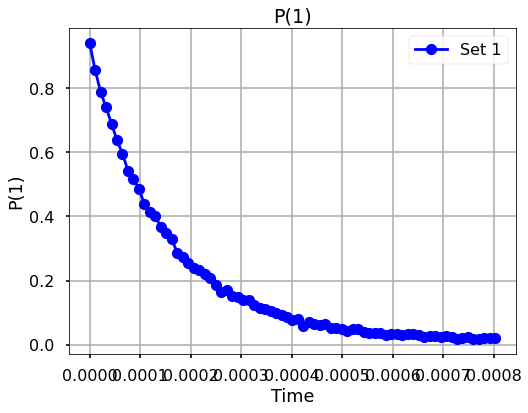

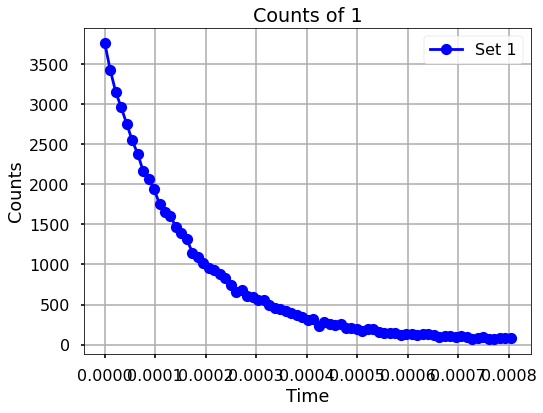

In [39]:
time=data_lists[0]
datas=data_lists[2]

import matplotlib.pyplot as plt


# Create a plot
plt.figure(figsize=(8, 6)) 
plt.plot(time, datas, label='Set 1', marker='o', linestyle='-', color='blue')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('P(1)')
plt.title('P(1)')
plt.legend()

# Show the plot
plt.grid(True) 
plt.show()


# Create a plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.plot(time, data_lists[1], label='Set 1', marker='o', linestyle='-', color='blue')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Counts of 1')
plt.legend()

# Show the plot
plt.grid(True) 
plt.show()


In [40]:
# the theoretical data was larger by 1e11 , so i divided it by 1e11
#dat_r means the data from HEOM was reversed. This is probably not correct.
p=[]
for i in dat_r:
    p.append(i/1e11)
    

r=[]
for j in data1:
    r.append(j/1e11)

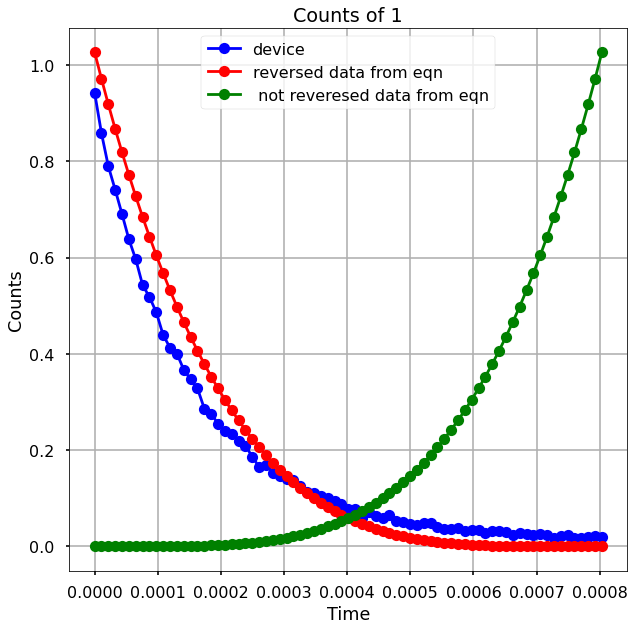

In [41]:
# Create a plot
plt.figure(figsize=(10, 10))  
plt.plot(time, datas, label='device', marker='o', linestyle='-', color='blue')
plt.plot(time, np.real(p), label='reversed data from eqn', marker='o', linestyle='-', color='red')
plt.plot(time, np.real(r), label=' not reveresed data from eqn', marker='o', linestyle='-', color='green')


# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Counts of 1')
plt.legend()

# Show the plot
plt.grid(True) 
plt.show()
